<a href="https://colab.research.google.com/github/ethancma/math152/blob/main/P4M_Notebook_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 4:  Introduction to NumPy and Visualization

Python lists -- objects of type `list` -- are flexible containers for all sorts of data.  They can hold numbers, strings, even other lists.  Python excels at list slicing, whereby one can examine and move and write entire "slices" of a list at once.  Lists are emblematic of Pythonic elegance.

[NumPy](http://www.numpy.org/) (and it's relative SciPy) are packages for numerical and scientific computation in Python.  These packages extend the capability of Python by defining new types which are highly optimized for floating-point and fixed-size integer computation.  They also extend the capability of Python by introducing new list-like types that allow multi-dimensional arrays (like matrices) and allow "broadcasting" -- the seemingly-simultaneous application of functions to all terms of such an array.

Here we will introduce computation with NumPy.  Since we will be working with large arrays of data, we will also introduce a few techniques for data visualization, using [MatPlotLib](https://matplotlib.org/) (for standard types of graphs) and [Pillow](https://python-pillow.org/) (for low-level graphics manipulation).

## Introduction to NumPy

To get started, we load the numpy package with the `import numpy as np` command.  This means that all numpy functions will be accessible in the form `np.<function>`.  For example, if we want to compute the square root of a number, using the numpy function, we would call it with `np.sqrt`.

To learn more about NumPy, get started with the [NumPy basics documentation](https://docs.scipy.org/doc/numpy/user/basics.html).

In [1]:
import numpy as np 

In [2]:
np.sqrt(10)

3.1622776601683795

### NumPy numerical types and "universal" functions (ufuncs)

In [3]:
type(np.sqrt(10))

numpy.float64

You'll notice right away that numpy has its own types.  The above command should output something like `numpy.float64` or `numpy.float32` (probably the first).  These are floating-point numbers (i.e., approximations of real numbers) which occupy 64 or 32 bits, depending on your computer (or Google's computers, if running on Colab).  The standard numerical types in NumPy are described [in the documentation](https://docs.scipy.org/doc/numpy/user/basics.types.html).  

By using specialized numerical types, NumPy is able to take advantage of your computer hardware, which is optimized for arithmetic on certain kinds of numbers.  NumPy types are typically a bit less flexible than pure Python types, e.g., you won't find an "adjustable" `int` type.  But for intensive computations, the reduction of flexibility is outweighed by the speed and memory improvements.

You can create a variable of a certain numpy type with a command of the form `x = np.<type>(something)`.  For example, let's create a numpy float from scratch.

In [4]:
x = np.float64(3.14) # Not just a float... a numpy-float.

In [5]:
print(x**10)

93174.3733866435


In [6]:
type(x**10)

numpy.float64

This is useful, if we want to tell our computer explicitly to use numpy for some computations instead of using the Python defaults.  But beware that types can be restrictive -- this is a good thing, in practice, but takes some getting used to.

We will be using the type `uint8` type a bit later.  This stands for 8-bit *unsigned* integers.  These are non-negative integers that can be encoded with 8 bits of information, i.e., whose binary expansion has eight ones and zeros.  For example, the 8-bit binary expression 10101010 stands for the integer 128+32+8+2 = 170.  Note that 8 bits = 1 byte... so each uint8 occupies one byte of memory.  

An 8-bit unsigned integer can represent integers between 0 and 255 (inclusive).  If your computations exceed this range, then a warning/error will result!

In [7]:
n = np.uint8(137) # n is an 8-bit unsigned integer.

In [8]:
bin(n) # The bits of n are in the string below, after the '0b'.  

'0b10001001'

In [9]:
print(n)

137


In [10]:
print(n*n) # Uh oh overflow.

81


<ipython-input-10-f4fababb22e9>:1: RuntimeWarning: overflow encountered in ubyte_scalars
  print(n*n) # Uh oh overflow.


These kind of restrictions are good and bad.  The bad is that more error messages will pop out and sometimes crash your functions.  Overflows can lead to *wrong* outputs.  The good is that you will be able to harness your computer's processor more effectively, and you will be forced to program more carefully.

NumPy also comes with some familiar constants:  $e$, $\pi$, and Euler's $\gamma$ (which you approximated before).

In [11]:
print(np.e)

2.718281828459045


In [12]:
print(np.pi)

3.141592653589793


In [13]:
print(np.euler_gamma) # The harmonic sum minus the logarithm, remember?

0.5772156649015329


NumPy also comes with a zoo of highly optimized, "broadcastable" (we'll see what this means soon) functions.  Examples include square roots, trig functions, exponentials and logarithms, GCD, and more.  A nice list of these "universal functions" is [in the documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations).

In [14]:
np.sin(np.pi / 4) # What will this be?  Remember precalculus?

0.7071067811865475

In [15]:
np.sqrt(2) / 2 # For comparison.  Note the little deviation from above... these can add up!!

0.7071067811865476

In [16]:
np.arctan(1) # The arctangent, or inverse tangent function

0.7853981633974483

In [17]:
np.pi / 4

0.7853981633974483

In [18]:
np.hypot(3,4) # Guess what this does!

5.0

### Python arrays

So far, we have seen that NumPy extends Python with more types for numbers, more constants, and more functions.  This is all useful, especially for math and science applications.  But the place where NumPy really offers a big improvement is in its handling of arrays.

A NumPy array is like a Python list... but less flexible in its contents, more flexible in its shape and size, and much more efficient for large-scale computations.  Let's begin by doing things that we know for lists, just within NumPy arrays instead.

In [19]:
L = np.array([1,2,3,4,5,6,7,8,9,10]) # Make a NumPy array from a list of numbers.
print(L) # Looks like a list.

[ 1  2  3  4  5  6  7  8  9 10]


In [20]:
print([1,2,3,4,5,6,7,8,9,10]) # But a Python list is printed with commas.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [21]:
print(L[0])  # NumPy arrays are indexed like plain-Python arrays.  Start at zero.

1


In [22]:
print(L[-1]) # Familiar Python indexing tricks are supported.

10


In [23]:
type(L) # But really, L is not a list!  It's a numpy.ndarray

numpy.ndarray

In [24]:
type(L[0]) # NumPy is treating the terms with numpy types.  int64 is a 64-bit signed integer type.

numpy.int64

In [25]:
print(L[1::3]) # Python list slices are supported in NumPy arrays.

[2 5 8]


So far, so good.  The NumPy array looks just like a Python list.  We can slice and access terms in the same way.  The only visible difference so far is that the type is different, using type `numpy.ndarray` for the array and `numpy.int64` for each of the terms.  Here is the [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) on the `numpy.ndarray` type. 

Here is where NumPy arrays really start to differ from lists.

In [26]:
L + L # What would this do for a list?

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [27]:
7 * L # What would this do for a list?

array([ 7, 14, 21, 28, 35, 42, 49, 56, 63, 70])

In [28]:
L * L # What would this do for a list?

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [29]:
np.sin(L) # What would this do for a list?

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849, -0.54402111])

WOAH!  That's completely different than how lists behave.  These computations indicate an important benefit of NumPy.  NumPy is really really good at doing functions to whole arrays of numbers.  In fact, if you try to operate on NumPy arrays, NumPy will try really hard to do the same function many times -- sometimes it will throw an error, but it is meant to behave well.

A tradeoff is that NumPy arrays are less flexible than Python lists.  In particular, items in a NumPy array must *all have the same type*.  For example, consider the array below.

In [30]:
M = np.array([1,2.5,3])  # It looks like an int, float, and int.
for m in M:
    print(m," has type ",type(m)) # What do you think this will do?

1.0  has type  <class 'numpy.float64'>
2.5  has type  <class 'numpy.float64'>
3.0  has type  <class 'numpy.float64'>


In [31]:
N = [1, 2.5, 3]
for n in N:
    print(n, "has type ",type(n)) # Plain Python lists are type-flexible.

1 has type  <class 'int'>
2.5 has type  <class 'float'>
3 has type  <class 'int'>


NumPy will try to *coerce* lists so that all items have the same type.  This can lead to awkward results.  Be careful, and use the `type` command if you're unsure what happened!

In [32]:
O = np.array([False, 2.5, 'Hello']) # NumPy has its own string type too.
for o in O:
    print(o, "has type ",type(o))

False has type  <class 'numpy.str_'>
2.5 has type  <class 'numpy.str_'>
Hello has type  <class 'numpy.str_'>


In [33]:
print(O) # Look at what numpy has done to O!

['False' '2.5' 'Hello']


In [34]:
P = np.array([1, [2,3]]) # NumPy will not be happy with this.  

<ipython-input-34-9fb7854545ca>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  P = np.array([1, [2,3]]) # NumPy will not be happy with this.


### Exercises

1.  Use an np.array to make an array of square roots of all the numbers from 1 to 100.  The first few should be 1.0, 1.414..., 1.732.  Use the np.sqrt function and arrays, *not* a for or while loop.

2.  Now do the same as above, but using plain Python lists.  Use the %timeit tool to compare the speed of the np.array approach with the plain Python approach.

3.  If `L` is a list, what do the commands `L+L`, `7*L`, `L*L` produce?  How is this different from the results if `L` were a numpy array?

4.  What types get coerced into what other types, when making a numpy array out of a mixed-type list?

In [35]:
# Use this space to complete the exercises. 
# Please put each exercise in a separate execution or markdown cell!  

In [36]:
# 1.
%timeit np_root_array = np.sqrt(np.array([range(1, 101)]))


25 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [37]:
# 2.
from math import sqrt
%timeit python_root_list = [sqrt(i) for i in range(1, 101)]
%timeit python_root_list_slow = [np.sqrt(i) for i in range(1, 101)]

"""
note the method through plain python lists are faster in this case because
the sqrt() function of numpy is the bottle neck. math.sqrt() is much faster
than numpy.sqrt(). Running the same code with np.sqrt() instead took around
164 micro seconds.
"""

34.3 µs ± 7.6 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
144 µs ± 39.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


'\nnote the method through plain python lists are faster in this case because\nthe sqrt() function of numpy is the bottle neck. math.sqrt() is much faster\nthan numpy.sqrt(). Running the same code with np.sqrt() instead took around\n164 micro seconds.\n'

In [38]:
# 3.
"""
If L is a python list, L + L would result in the contents of L appended twice.
7 * L would result in the contents of L appended 7 times in a row.
L * L would result in an error since that is an operation for integers.
"""

'\nIf L is a python list, L + L would result in the contents of L appended twice.\n7 * L would result in the contents of L appended 7 times in a row.\nL * L would result in an error since that is an operation for integers.\n'

In [39]:
# 4. 
"""
Types will typically get coerced into strings if there exists some other string
within the np array. One case, though, could be seen where we are given a mix of
integers and floats, and in this case the floats would take precedence and
integers would be casted and stored as floats. Booleans, integers, and floats
would be stored as strings if there were a list of booleans, integers, and
floats mixed together. However, mixing lists and other types will result in
errors.
"""

'\nTypes will typically get coerced into strings if there exists some other string\nwithin the np array. One case, though, could be seen where we are given a mix of\nintegers and floats, and in this case the floats would take precedence and\nintegers would be casted and stored as floats. Booleans, integers, and floats\nwould be stored as strings if there were a list of booleans, integers, and\nfloats mixed together. However, mixing lists and other types will result in\nerrors.\n'

## Higher-dimensional arrays

Lists in Python are "one-dimensional".  A list like `L = [1,2,3]` has a zeroth, first, and second item (or "element" or "entry"), which can be retrieved with `L[0]` or `L[1]` or `L[2]`.  For matrices, or other multidimensional arrangements, one might wish for a list which is "doubly-indexed" -- something where the entries would be retrieved with a command like `L[1,2]` (for something in the 1st row and 2nd column).  It's possible to make this work in plain Python by using lists of lists.  For example, if `M = [[1,2],[3,4]]` is a list of lists, then you can retrieve numbers with commands like `M[0][1]`.  But this gets a bit cumbersome and is not optimized for typical operations on matrices.

### Making multidimensional arrays

NumPy arrays can be, and often are, multidimensional.  In fact, why is the NumPy type called `numpy.ndarray` instead of `numpy.array`?  The `nd` in `ndarray` stands for "n-D" or "n-dimensional".  Accessing elements and slicing multidimensional arrays takes a bit of practice, and that's what we'll do here.

In [40]:
M = np.array([[1,2,3],[4,5,6]])  # Put a list of lists into an array.

In [41]:
print(M)

[[1 2 3]
 [4 5 6]]


If we put a list of lists into an `np.array` then NumPy will try to put it into a single "multi-dimensional" array.  Here, NumPy has taken a list of two lists and assembled the items into a two-by-three matrix.  When you use the print command, it will print nicely.

In [42]:
BadM = np.array([[1,2,3],[1,2]])  # Bad idea.

<ipython-input-42-230213a6541e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  BadM = np.array([[1,2,3],[1,2]])  # Bad idea.


In [43]:
print(BadM) # This will not be pretty.

[list([1, 2, 3]) list([1, 2])]


If your lists don't have the right size to form a matrix, numpy will fail to create a multidimensional array.  It will do its best, but the results won't be pretty!

Returning to our nice matrix `M`... just as lists have a single *length* accessed with `len`, multidimensional arrays have a `shape` which describes the number of rows, columns, etc..  This is accessed with the shape *method*.

In [44]:
print(M)
M.shape  # shape is an attribute of every matrix.  You don't write shape(M), you write M.shape  

[[1 2 3]
 [4 5 6]]


(2, 3)

In [45]:
type(M.shape) # We haven't seen this type in a while!

tuple

In [46]:
print(2*M)

[[ 2  4  6]
 [ 8 10 12]]


In [47]:
print(M*M)

[[ 1  4  9]
 [16 25 36]]


Basic operations and numpy-enabled functions are "broadcast" through higher-dimensional arrays, just like they are through one-dimensional list-like arrays.

Sometimes it is useful to create arrays of a given shape that are empty, or full of zeros, or full of ones, or full of a single number, or full of random numbers.  You can read about more ways to create arrays from [the official documentation](https://numpy.org/doc/stable/user/basics.creation.html).  The following examples were taken from [another tutorial](http://cs231n.github.io/python-numpy-tutorial/#scipy-image)

In [48]:
a = np.zeros((3,4))   # Create an array of all zeros, of the given shape (3 rows, 4 columns)
print(a)            

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [49]:
b = np.ones((4,2))    # Create an array of all ones, of the given shape.  Note the shape is a tuple.
print(b)              

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [50]:
c = np.full((3,5), 7)  # Create a constant array, of the given shape and constant.
print(c)               

[[7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]]


In [51]:
d = np.eye(3)         # Create an identity matrix (square) of the given size.
print(d)              

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [52]:
e = np.random.random((4,4))  # Create an array filled with random floats between 0 and 1.
print(e)               

[[0.43100016 0.19702727 0.86131491 0.01329985]
 [0.63537335 0.30981264 0.91079888 0.39878147]
 [0.95518329 0.69069996 0.24157411 0.28614267]
 [0.93742195 0.78828864 0.21526961 0.63068171]]


In [53]:
f = np.random.randint(1,7,(5,3)) # Roll the dice... an array of random integers between 1 and 6.
print(f)

[[5 3 4]
 [4 5 6]
 [2 6 5]
 [2 2 3]
 [5 1 2]]


In [54]:
cube = np.random.random((2,2,2)) # Why stop at 2-dimensional arrays?  Let's make a cube!
print(cube)

[[[0.39952378 0.30065578]
  [0.47589803 0.74023155]]

 [[0.61805299 0.07807772]
  [0.31017785 0.66932723]]]


NumPy can work with 3-dimensional, 4-dimensional, etc., arrays with ease.  *Printing* high-dimensional arrays on our 2-dimensional computer monitors might not be pretty, but NumPy will do its best.

### A random interlude

The previous few examples used NumPy's random subpackage -- a series of functions which can be used to generate "random" numbers.  There's a whole science to generating "random" and [really random](https://en.wikipedia.org/wiki/Hardware_random_number_generator) numbers.  It can be difficult to convince a computer, designed for predictable operations, to produce truly unpredictbale numbers.  In fact, NumPy's random number generator uses the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) to generate *pseudo-random* numbers.  These are great for most scientific purposes, e.g., for random sampling.  But they are *not* cryptographically secure -- they should be not be used for generating random cryptographic keys to keep your data secure.  

Read the [Numpy documentation](https://numpy.org/doc/1.16/reference/routines.random.html) for more about the capabilities of the random subpackage.  Here are a couple examples to give a quick survey.

In [55]:
np.random.random(3)  # An array of three numbers, uniformly at random in [0,1)

array([0.62925291, 0.57687035, 0.52141068])

In [56]:
np.random.randint(1, 7, (5,5))  # Twenty-five rolls of the dice (random ints).  Note the list-like bottom/top of range.

array([[1, 5, 5, 1, 5],
       [5, 3, 4, 6, 3],
       [6, 6, 5, 5, 2],
       [2, 3, 4, 6, 5],
       [3, 5, 2, 5, 4]])

In [57]:
np.random.choice(['apple', 'banana', 'orange', 'plum'], 10) # Ten random choices from the list.

array(['plum', 'banana', 'banana', 'banana', 'apple', 'apple', 'banana',
       'banana', 'orange', 'apple'], dtype='<U6')

In [58]:
np.random.randn(10) # Ten random choices from the *normal* or *Gaussian* distribution, mean 0, std 1.

array([ 0.57845221, -0.96239984, -1.1632354 , -1.27880782, -0.12768073,
       -1.24695215,  2.48332471, -0.28510838, -0.44105066,  0.06869146])

### Accessing and slicing multi-dimensional arrays

How do we access the terms of a multi-dimensional array?  Let's return to our 2x3 example.

In [59]:
print(M) # Remember this matrix?

[[1 2 3]
 [4 5 6]]


In [60]:
print(M[0,0], M[0,1], M[0,2]) # What do you think this will do?

1 2 3


In [61]:
print(M[1,0],M[1,1],M[1,2]) # And this?

4 5 6


The syntax `M[x,y]` retrieves the value in row #x and column #y, using the Pythonic convention that all numbering starts at zero.  This enables quick access to individual values.  This row-then-column syntax extends to all sorts of array-slicing.  To see this, we begin by creating a bigger matrix.  We'll use the NumPy `reshape` command to take an ordinary 1-dimensional array (the numbers 0...99) and *reshape* this array into a 2-dimensional array with 5 rows and 20 columns.

In [62]:
A = np.array(range(100))
print(A) # There might seem to be multiple rows, but that's just because A doesn't fit on a single line.
B = np.reshape(A,(5,20))
print(B) # Notice the extra brackets!  This is a 2-dimensional array, i.e., a matrix.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]


In [63]:
print(B) # The whole matrix.

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]


In [64]:
print(B[1,:]) # Row 1.  Column anything.

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [65]:
print(B[:, 2]) # Column 2.  Row anything. Notice that it's formatted as a 1-dimensional array!  No longer vertical!

[ 2 22 42 62 82]


In [66]:
type(B[:,2]) # Still a numpy array.

numpy.ndarray

In [67]:
print(B[:, 1::2]) # Every row.  Which columns do you think will be displayed?  Remember start:stop:skip.

[[ 1  3  5  7  9 11 13 15 17 19]
 [21 23 25 27 29 31 33 35 37 39]
 [41 43 45 47 49 51 53 55 57 59]
 [61 63 65 67 69 71 73 75 77 79]
 [81 83 85 87 89 91 93 95 97 99]]


In [68]:
print(B[1:, 3:5]) # Predict what will happen before you run it.

[[23 24]
 [43 44]
 [63 64]
 [83 84]]


NumPy has nice commands to operate on rows and columns of arrays.

In [69]:
print(B) # Let's just remember what B was.

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]


In [70]:
np.sum(B) # Add up all the terms of B, i.e., 0+1+2+...+99

4950

In [71]:
print(np.sum(B, axis=0))  # Try this... what does the result mean?

[200 205 210 215 220 225 230 235 240 245 250 255 260 265 270 275 280 285
 290 295]


In [72]:
print(np.sum(B, axis=1))  # And what does this result mean?

[ 190  590  990 1390 1790]


In [73]:
BigM = np.random.random((1000,1000)) # Just a little array of a million random numbers!

In [74]:
np.sum(BigM) # Let's just add up a million random numbers.

499803.0395990459

In [75]:
%timeit BigM * BigM # Don't print this one.

953 µs ± 96.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [76]:
%timeit np.sum(BigM)

467 µs ± 129 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [77]:
%timeit np.sum(BigM, axis=0)

407 µs ± 8.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The speed of NumPy can be *startling*.  I mean, really really fast.  Really.  Note that a blink of the eye takes about 400 ms.  And there are 1000 µs (microseconds) in 1 ms (millisecond).

### Matrix multiplication

One of the most important computations in linear algebra is matrix multiplication.  If $M$ and $N$ are two matrices, and the number of columns of $M$ equals the number of rows of $N$, then it's possible to multiply $M$ and $N$ to obtain a matrix product.  

Explicitly, if $P = M \cdot N$ is a matrix product, then the entries of $P$ are given by the formula,
$$P_{ij} = \sum_k M_{ik} N_{kj}.$$
Here, notation like $M_{ik}$ stands for the entry of $M$ at row $i$ and column $k$.

Let's begin by doing this *explicitly* for NumPy matrices.

In [78]:
def matrix_mult(M,N):
    '''
    A function to multiply two NumPy matrices.
    This is a bit more verbose than necessary, to improve clarity.
    '''
    Mrows = M.shape[0] # The number of rows of M
    Mcols = M.shape[1] # The number of columns of M.
    Nrows = N.shape[0] # The number of rows of N.
    Ncols = N.shape[1] # The number of columns of N.
    if Mcols != Nrows:
        raise ValueError('The number of columns and rows do not match.')
    P = np.zeros((Mrows,Ncols)) # Initialize the product matrix to all zeros, the right shape.
    Prows = Mrows
    Pcols = Ncols
    for i in range(Prows):
        for j in range(Pcols):
            # Now we are going to compute P_ij, the entry at row i and column j in the product matrix.
            # This is the sum in the above formula.  We set the running total to zero.
            S = 0
            for k in range(Mcols):
                S = S + M[i,k]*N[k,j] # Compare to the formula above!
            P[i,j] = S
    return P

In [79]:
A = np.array([[1,2,3],[4,5,6]])
print(A)
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [80]:
print(matrix_mult(A,B)) # Will it work?  Can you predict the shape of the result?

[[22. 28.]
 [49. 64.]]


It's good to study the code above, to understand how it connects to the definition of matrix multiplication.  But since matrix multiplication comes up so often, the designers of NumPy have implemented a highly optimized version.  This is called `dot`.

In [81]:
print(np.dot(A,B))

[[22 28]
 [49 64]]


In [82]:
%timeit matrix_mult(A,B)

12.2 µs ± 3.6 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [83]:
%timeit np.dot(A,B)

2.35 µs ± 82.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Let's see how the speedup works for bigger matrices... like 100 by 100 matrices with 10000 random floats in each!

In [84]:
A = np.random.random((100,100))
B = np.random.random((100,100))

In [85]:
%timeit matrix_mult(A,B)

437 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [86]:
%timeit np.dot(A,B) # How about that for a speedup!!

124 µs ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Check the units... how much faster does np.dot run than our basic Python loop implementation?

### Exercises

1.  Put the list of numbers `[1,...,12]` into all possible shapes of 2-dimensional, and 3-dimensional numpy arrays, using the reshape command.  Print the results.  Only try the shapes where all dimensions are greater than one (i.e., don't make a 1 by 12 array).

2.  Make a square array containing the numbers `[0,...,99]`.  Use list-slicing syntax to reverse the row-order of this array.  Use list-slicing syntax to *transpose* this array (reflect it across the diagonal of the original).

3.  If you roll ten fair 6-sided dice, you expect the total to be 35, on average.  The minimum total would be 10 and the maximum would be 60.  Use numpy to create a array with 50 rows and 10 columns of random dice rolls (random integers between 1 and 6).  By summing rows, create an array of numbers between 10 and 60.  What is the average of this array (a number between 10 and 60)?  What is the standard deviation of this array?  (Use the `np.std` function for standard deviation.)  Use numpy functions throughout -- no loops please!  

4.  Define a function `matrix_pow(M,e)` which takes as input a *square* matrix `M` and a natural number `e`.  The output should be the result of matrix multiplication, with `M` multiplied by itself `e` times.  When `e` is zero, the function should output the identity matrix `np.eye(s)` where `s` is the number of rows (or columns) of `M`.

5.  The matrix exponential is defined by the same Taylor series as the usual exponential function, but one allows square matrices as inputs instead of just numbers.  Define a function `matrix_exp(M)` which computes the matrix exponential of `M` using the first 20 terms of the (familiar) series, and uses the `matrix_pow` function from the previous question.

In [87]:
# 1.
twelve_array = np.array(range(1, 13))
print(np.reshape(twelve_array, (2, 6)))
print(np.reshape(twelve_array, (3, 4)))
print(np.reshape(twelve_array, (4, 3)))
print(np.reshape(twelve_array, (6, 2)))
print(np.reshape(twelve_array, (2, 2, 3)))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [88]:
# 2.
square_array = np.reshape(np.array(range(100)), (10, 10))
print(f"original array: \n{square_array}\n")

reversed_row_order = square_array[-1::-1]
print(f"reversed row order array: \n{reversed_row_order}\n")

transposed_array = np.zeros((10, 10))
for i in range(10):
    transposed_array[:, i] = square_array[i, :]
print(f"transposed array: \n{transposed_array}")

original array: 
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

reversed row order array: 
[[90 91 92 93 94 95 96 97 98 99]
 [80 81 82 83 84 85 86 87 88 89]
 [70 71 72 73 74 75 76 77 78 79]
 [60 61 62 63 64 65 66 67 68 69]
 [50 51 52 53 54 55 56 57 58 59]
 [40 41 42 43 44 45 46 47 48 49]
 [30 31 32 33 34 35 36 37 38 39]
 [20 21 22 23 24 25 26 27 28 29]
 [10 11 12 13 14 15 16 17 18 19]
 [ 0  1  2  3  4  5  6  7  8  9]]

transposed array: 
[[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
 [ 1. 11. 21. 31. 41. 51. 61. 71. 81. 91.]
 [ 2. 12. 22. 32. 42. 52. 62. 72. 82. 92.]
 [ 3. 13. 23. 33. 43. 53. 63. 73. 83. 93.]
 [ 4. 14. 24. 34. 44. 54. 64. 74. 84. 94.]
 [ 5. 15. 25. 35. 45. 55. 65. 75. 85. 95.]
 [ 6. 16. 26. 3

In [89]:
# 3. 
lots_dice_rolls = np.random.randint(1, 7, (50, 10))
sum_rows = np.sum(lots_dice_rolls, axis=1)
average = (np.sum(sum_rows) / 50)
print(f"Average: {average}")
print(f"Standard Deviation: {np.std(sum_rows)}")

Average: 35.34
Standard Deviation: 5.03432219866786


5. The matrix exponential is defined by the same Taylor series as the usual exponential function, but one allows square matrices as inputs instead of just numbers. Define a function matrix_exp(M) which computes the matrix exponential of M using the first 20 terms of the (familiar) series, and uses the matrix_pow function from the previous question.

In [90]:
# 4.
def matrix_pow(M, e):
    if not e:
        return np.eye(M.shape[0])
    thing = M
    for i in range(e):
        thing = np.dot(M, thing)
    return thing

matrix_4 = np.full((4, 4), 2)
print(matrix_pow(matrix_4, 2))

[[128 128 128 128]
 [128 128 128 128]
 [128 128 128 128]
 [128 128 128 128]]


In [91]:
# 5.
def matrix_exp(M):
    fact = 1
    sum = np.eye(M.shape[0])
    for i in range(1, 20):
        sum += 1/i * matrix_pow(M, i)
    return sum

## Introduction to 2-dimensional graphics in Python

The visualization of quantitative information is a huge field of study.  The now-classic book in the field is Edward Tufte's [The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi), but you can find much earlier works by the best-named statistician [Playfair](https://en.wikipedia.org/wiki/William_Playfair) or the beautiful but vexing *Semiology of Graphics* by Jacques Bertin.

In this notebook, we are going to introduce two tools for visualization.  The first is [matplotlib](https://matplotlib.org/), which has the same number of letters and syllables as [manbearpig](https://en.wikipedia.org/wiki/ManBearPig).  Matplotlib is an excellent tool for creating a huge number of "standard" graphs and charts.  It works very nicely in Jupyter notebooks, interfaces with numpy, and is very widely supported.

The second tool is [Pillow](https://python-pillow.org/) which is the new and fluffy incarnation of PIL, the Python Imaging Library.  We will use Pillow for "low-level" 2-dimensional image manipulation.  Pillow is great when we want to create or modify an image pixel-by-pixel.  It's not so great if we just want to make a graph with some dots, lines, axes, and labels.  

Other tools worth consideration are:  [SVGwrite](https://pypi.org/project/svgwrite/) for working with scalable vector graphics and [Bokeh](https://bokeh.pydata.org/en/latest/) for making very pretty interactive graphics on the web.  Also [Seaborn](https://seaborn.pydata.org/) for a visualization system based on matplotlib, but with more modern styling.  For producing print-ready graphics, I use a strange combination of Python and [TikZ/PGF](http://www.texample.net/tikz/examples/all/).

### Introduction to matplotlib

Matplotlib can be used to make all sorts of graphs and charts from your data.  Often the best way to use matplotlib is to look at the [matplotlib gallery](https://matplotlib.org/gallery/index.html) and find an example as a starting point.  But it's difficult getting started with matplotlib unless you understand its basic framework.

Here we limit ourselves to three fundamental types of visualization in matplotlib:  the [histogram](https://en.wikipedia.org/wiki/Histogram), the [line chart](https://en.wikipedia.org/wiki/Line_chart), and the [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot).  To use matplotlib's plotting capabilities, we load the matplotlib.pyplot package as plt (just as we loaded numpy as np).  The pyplot part of matplotlib is meant to work like Matlab.  You can follow the [official pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) for more.

In [92]:
import matplotlib.pyplot as plt # Use plt.<command> hereafter.

### Scatter plots

The *scatter plot* might be the simplest sort of 2-dimensional data visualization.  If your data is a set of ordered pairs $(x,y)$ of numbers, then a scatter plot visualizes this data by putting a dot at every coordinate in the data.  Here is a minimalist example.  Note that the data is organized as *two separate arrays* -- one for the x-coordinates and the other for the y-coordinates.  

In [93]:
xlist = np.random.randint(1,11,20) # A list of 20 random numbers between 1 and 10
ylist = np.random.randint(1,11,20) # Another such list.
print(xlist)
print(ylist)

[10  8  9  3  4 10  1  8  8  5  5  6  9  9  5 10  8  5  6  5]
[ 2  5  1  3  5  5  9  3  7  7  8  1 10 10  2  1  7  5  2  5]


We are going to use these numbers as the x-coordinates and y-coordinates for a series of dots.  A more explicit description is given by running the cell below.  (Also, a reminder of string formatting!)

In [94]:
for i in range(len(xlist)):
    print("({}, {}) will be plotted".format(xlist[i], ylist[i]))

(10, 2) will be plotted
(8, 5) will be plotted
(9, 1) will be plotted
(3, 3) will be plotted
(4, 5) will be plotted
(10, 5) will be plotted
(1, 9) will be plotted
(8, 3) will be plotted
(8, 7) will be plotted
(5, 7) will be plotted
(5, 8) will be plotted
(6, 1) will be plotted
(9, 10) will be plotted
(9, 10) will be plotted
(5, 2) will be plotted
(10, 1) will be plotted
(8, 7) will be plotted
(5, 5) will be plotted
(6, 2) will be plotted
(5, 5) will be plotted


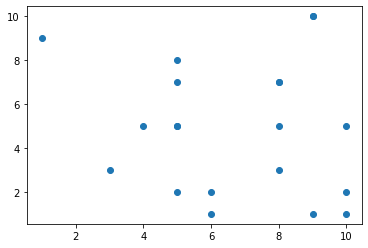

In [95]:
plt.scatter(xlist, ylist) # A picture should pop up!  If it doesn't, please get help.

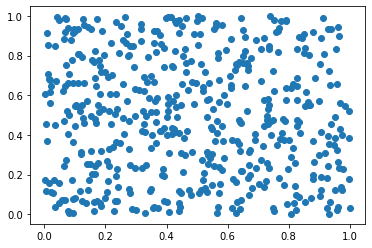

In [96]:
xlist = np.random.random(500) # A list of 500 random floats between 0 and 1.
ylist = np.random.random(500) # Another such list.
plt.scatter(xlist, ylist)

These examples are minimalist -- the quickest way to produce a plot, using all the matplotlib defaults.  Notice the axis ticks are automatically placed, the color of dots is an intelligent shade of blue, and the dots have a pleasing size and soft edge.  The single `plt.scatter(xlist, ylist)` created quite a complicated image from two lists of numbers.

Behind the scenes, there is a lot going on!  In fact, the `plt.scatter` function activates the pyplot *state machine* and *changes its state*.  When the cell containing the `plt.scatter` function is finished with its execution, the figure is rendered as an image in your browser, and the *state machine* is closed down.  

This "state machine" initializes a data structure, changes it according to `plt.<command>` functions, renders it to your browser, then disposes of the evidence.  Here is a more complicated example, which might be easier to decode.

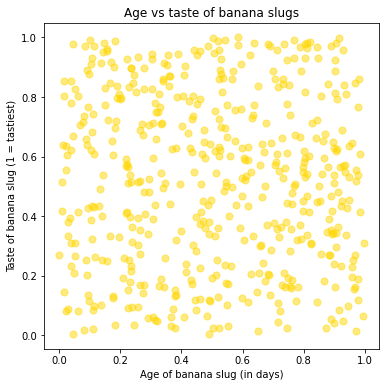

In [97]:
xlist = np.random.random(500) # A list of 500 random floats between 0 and 1.
ylist = np.random.random(500) # Another such list.

plt.figure(figsize=(6,6))
plt.scatter(xlist, ylist, alpha=0.5, c='gold', s=50)
plt.xlabel('Age of banana slug (in days)')
plt.ylabel('Taste of banana slug (1 = tastiest)')
plt.title('Age vs taste of banana slugs')
plt.show()

We're going to go through the whole figure-creation and display, line by line.  There's a lot going on!

1.  `plt.figure(figsize=(6,6))` starts the pyplot "state machine" by initializing a figure which is 6 inches by 6 inches in size.  The size on your screen may appear different, because your browser is smart.  If you want to manually set the figure size, you should do this before everything else.  All other `plt` commands in the cell will operate on this figure (the "state" of the "state machine").  Here is the basic [anatomy of a matplotlib figure](https://matplotlib.org/tutorials/introductory/usage.html)... it's quite complicated!

2.  `plt.scatter(xlist, ylist, alpha=0.5, c='gold', s=50)`.  This uses pyplot's built-in scatter-plot-maker.  The xlist and ylist are the lists of x-coordinates and y-coordinates... the data which is being plotted.  The `alpha` parameter sets the transparency of the dots, which is very important when there are overlaps!  An alpha value of 1 yields completely opaque dots.  The `c` parameter sets the color of the dots.  Here the dot color is set to `gold`.  Here is a [list of named colors](https://matplotlib.org/examples/color/named_colors.html).  More fun than crayons!  The `s` parameter sets the size of the dots, measured by area.  Here is the [complete list of parameters](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) that can be passed to the `plt.scatter` function.

3.  `plt.xlabel('Age of banana slug (in days)')`.  This sets the label on the x-axis of the active figure.

4.  `plt.ylabel('Taste of banana slug (1 = tastiest)')`.  This sets the label on the y-axis of the active figure.

5.  `plt.title('Age vs taste of banana slugs')`.  This sets the title of the active figure.

6.  `plt.show()`.  Not strictly necessary, but a good habit.  This shows the plot.  After the cell is run, the "state machine" is effectively turned off and forgotten.  `plt` commands in later cells will not be able to change the plot you've created.

You might wish to change some of the parameters in the above figure, and re-run the cell, to see the effect.

Text(0.5, 0, 'Can I change the label?')

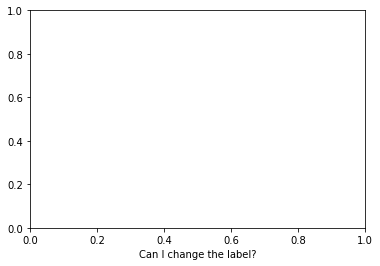

In [98]:
plt.xlabel('Can I change the label?')

When the banana-slug cell was executed, its state machine was turned off.  So if you try to make a change in a new cell with `plt.xlabel('...')`, you will end up *restarting* the state-machine in a mostly empty state, and then setting the xlabel of this new figure.  When you run the new cell, the figure is displayed, with your new label, and that state machine is terminated.

Now we will make a scatterplot using the sine function.  Along the way, we use the numpy `arange` function.  The function `np.arange(a,b,s)` generates a numpy array which starts at `a` and ends *before* `b` and uses a step-size of `s`.  It's a lot like a range command, but... note that the `arange` function *does* put all the numbers into memory.  So beware and do not try to store a trillion numbers in your computer memory!

In [99]:
print(np.arange(0,10,1)) # Looks familiar?

[0 1 2 3 4 5 6 7 8 9]


In [100]:
print(np.arange(0,5,0.3)) # A bit more flexible.

[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3.  3.3 3.6 3.9 4.2 4.5 4.8]


In [101]:
range(0,5,0.3) # The range command does not play nicely with floats.

TypeError: ignored

In [102]:
xlist = np.arange(0, 10,0.1) # The list 0,0.1, 0.2, 0.3, etc. up to 9.9.
sinlist = np.sin(xlist) # apply the sine function to each item in the list, via broadcasting.
coslist = np.cos(xlist)

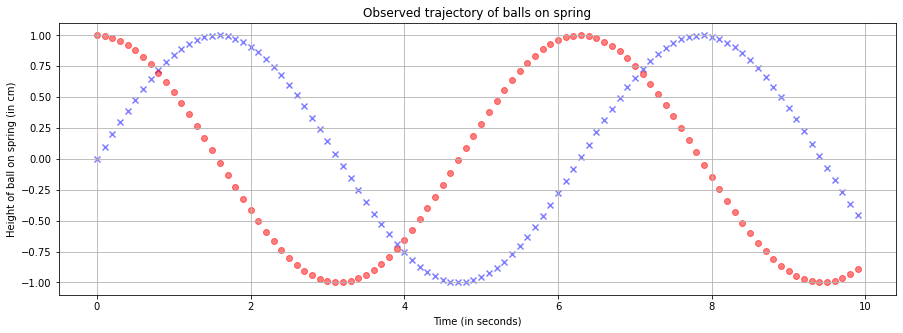

In [103]:
plt.figure(figsize=(15,5))
plt.scatter(xlist, sinlist, alpha=0.5, c='blue', marker='x') # See the marker?
plt.scatter(xlist, coslist, alpha=0.5, c='red', marker='o') # Multiple plots, no problem!
plt.grid() # A grid might help.
plt.xlabel('Time (in seconds)')
plt.ylabel('Height of ball on spring (in cm)')
plt.title('Observed trajectory of balls on spring')
plt.show()

### Line plots in matplotlib

The previous example contains plots of the sine and cosine functions.  It is a bit unusual to plot functions with scatterplots; one would typically use a plot that "connects the dots" to reflect the continuity of the functions. While `plt.scatter` produces a scatter-plot, the simply-named `plt.plot` command produces a plot that connects the dots.   

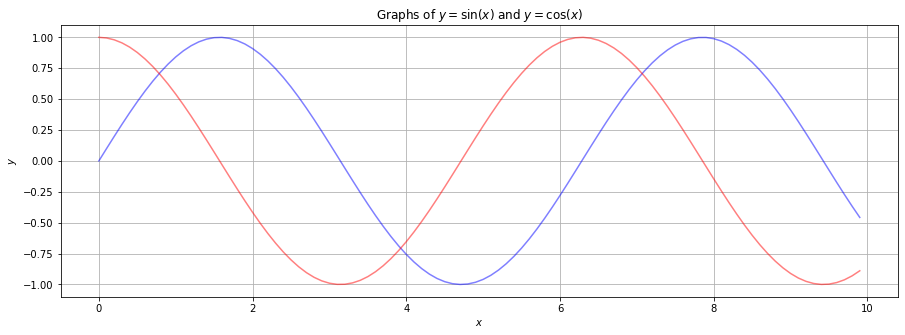

In [104]:
plt.figure(figsize=(15,5))
plt.plot(xlist, sinlist, alpha=0.5, c='blue') 
plt.plot(xlist, coslist, alpha=0.5, c='red') # Multiple plots, no problem!
plt.grid() # A grid might help.
plt.xlabel('$x$') # Notice the dollar signs... matplotlib understands basic LaTeX in text!
plt.ylabel('$y$')
plt.title('Graphs of $y = \sin(x)$ and $y = \cos(x)$')
plt.show()

Like everything with matplotlib, there are zillions of possible adjustments and additions one can make to this plot.  Here we just mention two.

1.  Changing the axis ticks to be more relevant.
2.  A *legend* that is advisable when plotting multiple functions.

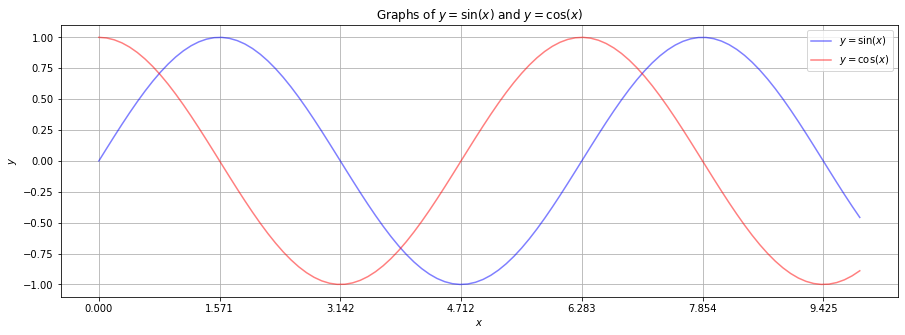

In [107]:
plt.figure(figsize=(15,5))
plt.plot(xlist, sinlist, alpha=0.5, c='blue', label='$y=\sin(x)$') # label for the legend.
plt.plot(xlist, coslist, alpha=0.5, c='red', label='$y=\cos(x)$') # label for the legend.
plt.xticks(np.arange(0,10,np.pi/2)) # x-axis ticks (gridlines) are at multiples of pi/2.
plt.grid() # A grid might help.
plt.xlabel('$x$') # Notice the dollar signs... matplotlib understands basic LaTeX in text!
plt.ylabel('$y$')
plt.title('Graphs of $y = \sin(x)$ and $y = \cos(x)$')
plt.legend() # Insert the legend, based on the plot labels.
plt.show()

Note the x-ticks are at $0$, $\pi/2$, $\pi$, $3 \pi / 2$, etc..  But they are labeled by floating point values.  We can fix this by making custom labels.  We store the x-tick locations in a numpy array `pimult` and the x-tick labels in another numpy array (of strings) `xlabels`.  It's a bit tedious, but the result will look nice.  Note that matplotlib will process the basic LaTeX that we use in the labels.

In [108]:
pimult = np.arange(0,10,np.pi / 2) # The list of locations of the x-ticks.
xlabels = np.array(['0', '$\pi/2$', '$\pi$', '$3 \pi / 2$', '$2 \pi$', '$5 \pi / 2$', '$3 \pi$'])

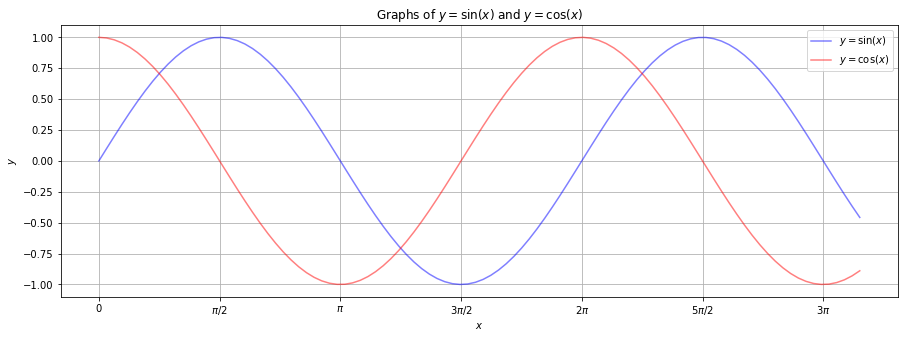

In [109]:
plt.figure(figsize=(15,5))
plt.plot(xlist, sinlist, alpha=0.5, c='blue', label='$y=\sin(x)$') # label for the legend.
plt.plot(xlist, coslist, alpha=0.5, c='red', label='$y=\cos(x)$') # label for the legend.
plt.xticks(pimult, xlabels) # x-axis ticks and labels.
plt.grid() # A grid might help.
plt.xlabel('$x$') # Notice the dollar signs... matplotlib understands basic LaTeX in text!
plt.ylabel('$y$')
plt.title('Graphs of $y = \sin(x)$ and $y = \cos(x)$')
plt.legend() # Insert the legend, based on the plot labels.
plt.show()

For plotting functions, there are many tools out there.  One can use [Desmos](https://www.desmos.com/), for example, or Excel, or *Grapher* (preinstalled on every Apple computer).  But the line plotting in matplotlib is more flexible than most.  For example, let's plot a "random walk".

In [110]:
xlist = np.zeros(100) # Initialize arrays of zeros.
ylist = np.zeros(100) 
x,y = 0,0 # We start at (0,0).
for t in range(100):  # t will be the "time" parameter for the walk.
    xlist[t] = x
    ylist[t] = y
    x += np.random.random()-0.5 # Add a random number between -0.5 and 0.5 to x.
    y += np.random.random()-0.5 # Add a random number between -0.5 and 0.5 to x.

Note that we began by initializing xlist and ylist to an array of zeros, and *not* an empty array.  We did *not* begin with `xlist = np.array([])` and then append new x-values.  There's an important reason for this, having to do with the optimization of NumPy.  

When NumPy stores an array, it finds a block of *consecutive* memory slots for the array values.  So if you start with an array of 100 zeros (as float64s), NumPy will find 6400 consecutive bits of memory in your computer, and set them to represent 100 consecutive zeros (each stored in a 64-bit clump).  

If you *append* to a NumPy array, NumPy will be annoyed.  NumPy has already found a perfectly-sized block of memory for your data, and now you are asking NumPy to fit more data in the block.  So NumPy will go out and hunt for a new perfectly-sized block of memory to fit your data... every single time you append.  This will waste resources and make NumPy sad.

On the other hand, NumPy will be perfectly happy to *change* the bits of memory that it has allocated.  So starting with all zeros, and changing those zeros to other 64-bit numbers, will keep NumPy HapPy.

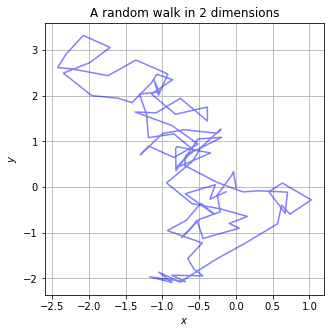

In [111]:
plt.figure(figsize=(5,5))
plt.plot(xlist, ylist, alpha=0.5, c='blue') # label for the legend.
plt.grid() # A grid might help.
plt.xlabel('$x$') # Notice the dollar signs... matplotlib understands basic LaTeX in text!
plt.ylabel('$y$')
plt.title('A random walk in 2 dimensions')
plt.show()

### Histograms in matplotlib

A *histogram* is most frequently used to display the *distribution* of a single numerical variable.  In other words, if one has a big *set* of numbers, a histogram is used to display how these numbers are distributed:  are they clumped near a "center" or are they "multimodal" (having multiple "centers")?  Are they "uniformly distributed" within a range?  How much "noise" is present?  

To understand histograms, we begin with a set of numbers, represented in a numpy array.  
Read the [full histogram documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) for more!

In [112]:
A = np.random.random(100) # A list of 100 random numbers between 0 and 1.

The following code is a minimalist sort of histogram.

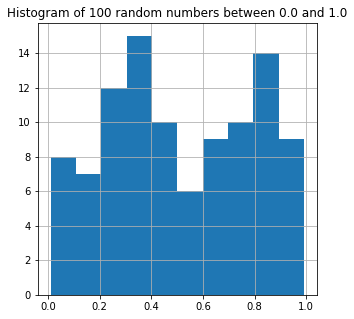

In [113]:
plt.figure(figsize=(5,5))
plt.hist(A, bins=10) # Divide the range of numbers into 10 "bins".
plt.grid()
plt.title("Histogram of 100 random numbers between 0.0 and 1.0")
plt.show()

The new ingredient here is the `plt.hist(A, bins=10)` command.  This carries out the following steps.

1.  It identifies the smallest value of the array `A` and the largest value of the array `A`, and subdivides the space between this min and max into 10 "bins".

2.  It counts the number of values within each bin.

3.  It draws a bar for each bin, whose height is the number of values within each bin.

For histogram, the automatic layout is often difficult to read.  We can choose the bins manually, and add xticks and yticks, to display the information more clearly.  We are going to use the `np.linspace` command, explained just below.

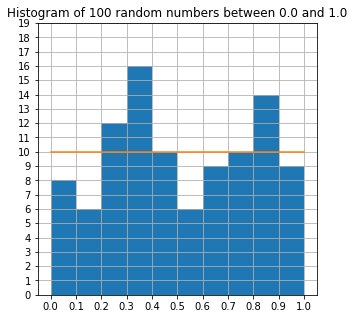

In [114]:
plt.figure(figsize=(5,5))
plt.hist(A, bins=np.linspace(0,1,11)) # Divide the range of numbers into 10 "bins".
plt.plot ((0,1), (10,10)) # Compare to the flat distribution.
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.arange(0,20,1))
plt.grid()
plt.title("Histogram of 100 random numbers between 0.0 and 1.0")
plt.show()

The only new ingredient was the `np.linspace` command, which is a very useful variant of `np.arange`.  The command `np.arange(start, stop, step)` creates a numpy array that begins at `start` and ends *just before* `stop` using intervals of `step`.  This should be familiar from the usual Python `range` command.

The command `np.linspace(start, stop, length)` creates a numpy array that begins at `start` and ends *at* `stop`, using `length` evenly spaced values.  This is particularly useful for graphing, where you might know the domain interval and the number of samples you wish to compute.

### Matplotlib Exercises

1.  Use `np.arange` and `np.linspace` to product the same numpy array `array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])`.  

2.  Create numpy arrays `xlist` and `ylist`, such that their scatter plot contains 100 evenly spaced points on the unit circle.

3.  Use numpy to create a 10000 by 100 array of numbers, randomly chosen from {0,1}, with the command `R = np.random.choice([0,1], (10000,100))`.  You can think of each entry as a coin-toss, with 0 standing for tails and 1 for heads.  Now sum the rows of this array, to get an array of 10000 numbers between 0 and 100.  Make a histogram of this array to exhibit the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).  Use at least 20 bins.  Try this with other random choices of numbers, e.g., replacing [0,1] by other small lists of numbers.  How is the horizontal center of the histogram peak related to the list of numbers you choose?  Extra time? compare to the normal distribution by overlaying a suitable plt.plot.

In [125]:
# Use this space for the exercises.
# Make sure each plot is in a different cell!
# 1. 
print(np.arange(0, 11, 1.0))
print(np.linspace(0, 10, 11))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [ ]:
# 2.
xlist = np.zeros(100)
ylist = np.zeros(100)


## Visualization with pillow

The Python Imaging Library (PIL) was started over 20 years ago, as a package for working with images (in formats like jpg, png, bmp, etc.) in Python.  Development of PIL mostly stopped in 2011, but is thankfully revived as [Pillow](https://pillow.readthedocs.io/en/stable/) (the "friendly PIL fork").  

Let's see if it works, with some basic code below.

In [ ]:
from PIL import Image # Load the package.

A matplotlib figure is built of certain elements -- axes, labels, dots, lines, legends, grids, ticks, etc..  By design, these elements are meant to be assembled into a large but standard zoo of scientific graphics.

In contrast, PIL works with images at a more rudimentary level.  In the lines below, we use NumPy to create a 3-dimensional array of numbers, and then use PIL to turn these numbers into an image, save the image, and display the image.

In [ ]:
array = np.zeros([256, 256, 3], dtype=np.uint8) # Recall uint8 = unsigned 8-bit integer.  Must be in 0...255.
for x in range(256): 
    for y in range(256): 
        array[x, y] = [x, y, 256-x//2]

In [ ]:
img = Image.fromarray(array) # Create an image from the array.
img.save('testrgba.png') # Save the image to Google's computer as a png file.  May not work well with colab.
display(img) # Display the image in the notebook.

In [ ]:
from google.colab import files
files.download('testrgba.png')  # If you want to download the PNG file to your computer.

To understand how this works, it is helpful to understand a bit more about light, computer monitors, and images-as-data.  Light is electromagnetic radiation, and it travels through space in waves.  Light waves with a wavelength of about 400-700 nanometers stimulate cells on our retina, and therefore are *visible*.  Longer wavelength light includes infrared, microwave, and radio waves.  Shorter wavelength light includes ultraviolet and x-rays.

For most of us, our retinas contain 3 types of "cone cells" which are responsive to different wavelengths of light.  Some are most responsive to light in the low 400 nm range, others to light in the low 500nm range, others in the mid 500nm range.  Signals from these three kinds of cells get passed to the brain, and we are able to distinguish between different wavelengths (in the 400-700nm range) by which cells are more or less activated.

If you see light purely in the 400-450 nm range, it looks pretty blue, whereas light at the 650-700 nm range looks pretty red.  A typical red laser pointer shines light that's close to 650nm.

Your computer monitor contains millions of *pixels* -- extremely tiny these days (often below 100 micrometers square).  Each pixel contains a red, a blue, and a green subpixel.  Each of these subpixels is individually dimmable, and is often set between 0 (completely off) and 255 (completely on).  In this way, each pixel can be black (red = 0, blue = 0, green = 0) or bright pure red (red = 255, blue = 0, green = 0) or white (red = 255, blue = 255, green = 255).

To understand how this makes "white" or "yellow" or all the other colors in the rainbow, you need to understand an *additive* color scheme as well as how light is perceived.  When light of multiple wavelengths hits your retina, your brain perceives a certain color.  In fact, if light of a red wavelength (680nm) and green wavelength (510nm) hits your retina at the same time, your brain will see it exactly the same as light of a yellow wavelength (560nm).  When you look at a bright yellow picture on your computer monitor, your computer is actually shining red and green light at your retina... the red and green dots are just so tiny and closely packed that your brain doesn't know the difference.

The code below creates a 200 by 200 by 3 array of numbers, each between 0 and 255.  But you should think about it as a 200 by 200 array of quadruples of the form `[red value, green value, blue value]`.  Each value can be between 0 and 255 -- it is represented as a np.uint8.

This array is then turned into a PIL Image with the `Image.fromarray` function.  Then the PIL function `display` displays the image.  Notice how red+green looks yellow.  Experiment with the red, green, and blue values to see what happens!


In [ ]:
solid = np.zeros((200, 200,3), dtype=np.uint8)
for x in range(200):
    for y in range(200):
        solid[y,x] = [255,255,0] # Red = 255, Green = 255, Blue = 0
img = Image.fromarray(solid) # Create an image from the array.
display(img)

In [ ]:
gradient = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
        gradient[y,x] = [x,128,0] # Red = x, Green = 128, Blue = 0
img = Image.fromarray(gradient) # Create an image from the array.
display(img)

There is something terribly confusing that happens when one goes back and forth between PIL images and NumPy arrays.  The x-coordinate and y-coordinate gets switched.  Notice in the above code that `gradient[y,x]` is being assigned a value `[x,128,0]`  This means that as x changes, the color chages (from green to orange).  The RGB triple stored in `gradient[y,x]` corresponds to the pixel with x-coordinate x.  That's why `[y,x]` is used and not `[x,y]`.

When we save images, we will use the png [portable network graphics](https://en.wikipedia.org/wiki/Portable_Network_Graphics) image format.  This is very commonly used for graphics on the web, and can be used to store all of the red/green/blue bytes of data in a rectangular image.  Most importantly for us, the png format is *lossless* -- every pixel will be saved as intended in a png file.  On the other hand, formats like jpeg *lose information* as they compress the image.

We can use Python (with PIL) to open images, modify them as NumPy arrays, and then display them and save them as images again.

To practice a bit of image manipulation, we are going to fix a very strange looking cat.  Begin by downloading the file `meowp.png` from this [GitHub link](https://github.com/MartyWeissman/PythonForMathematics/blob/main/meowp.png)  onto your computer.  Then use the following command to upload it to Google's server.

In [ ]:
files.upload()

In [ ]:
cat = Image.open('meowp.png')
display(cat)

To examine the image file, let's display a few things.

In [ ]:
print(cat.format) # What format does the image have?
print(cat.size) # What are the dimensions of the image?
print(cat.mode) # What is the color-mode of the image?

To manipulate this image, let's covert it to a NumPy array.

In [ ]:
catarray = np.asarray(cat)
print(catarray.shape)

If you look at the image, it looks like the red, green, and blue parts have been separated and overlayed in some weird way.  We can look at the red-channel only by creating a new red-only image.  We use the `catarray.copy()` command at the beginning to put our red-cat data into a new NumPy array (without harming the original catarray!)

In [ ]:
redcatarray = catarray.copy()
redcatarray[:,:,[1,2]] = 0  # Set all green and blue values equal to zero.
display(Image.fromarray(redcatarray))

Now let's look at the green channel by itself.

In [ ]:
greencatarray = catarray.copy()
greencatarray[:,:,[0,2]] = 0
display(Image.fromarray(greencatarray))

Now we see the problem!  Complete the exercises below to fix the image.

### Exercises

1.  Create a gradient-square which is blue at the top and red at the bottom.  

2.  Create and display the blue channel of the cat-image.  

3.  Flip the blue and green cat-images, so that they match the orientation of the red image.  Hint:  remember that `L[-1::-1]` reversed a list.  Try this syntax with the NumPy arrays!  Watch your x- and y- axis reversal! 

4.  Assemble the three properly oriented images (match the orientation of the red image) to assemble a complete RGB kitty.  Can you assemble the image without using any loops?

5.  (A little bit of [steganography](https://en.wikipedia.org/wiki/Steganography)!)  There's a coded message in the green channel, once it's oriented correctly.  The message is located at y-coordinate 10 and x-coordinates 0,8,16,24,32,etc.  Find this message by using applying the `chr` function to the green values at these locations.  If you want to experiment, the `ord` function converts characters (one-letter strings) to uint8's and the `chr` function converts uint8's to characters, using ASCII code.